In [15]:
import pandas
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['xtick.labelsize'] = '14'
plt.rcParams['ytick.labelsize'] = '14'

%matplotlib notebook

In [16]:
# Replace this variable accordingly 
path_to_results = "../experiments/2018-10-11-08-08_Power_/"

In [17]:
data = pandas.read_csv(path_to_results + "Power.csv", header=0)
data["category"] = [x.split("-")[0] for x in data["refId"]]

In [18]:
data["nDim"].unique()

array([2, 3, 5])

In [19]:
data["noise"].unique()

array([ 0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
        0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
        0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
        0.5       ,  0.53333333,  0.56666667,  0.6       ,  0.63333333,
        0.66666667,  0.7       ,  0.73333333,  0.76666667,  0.8       ,
        0.83333333,  0.86666667,  0.9       ,  0.93333333,  0.96666667,  1.        ])

In [20]:
data["category"].unique()

array(['0', 'Independent', 'Linear', 'Sine_1', 'Sine_5', 'HyperSphere',
       'DoubleLinear_0.25', 'Cross', 'Parabolic_1', 'Hourglass', 'Star',
       'HypercubeGraph', 'Zinv', 'Hypercube'], dtype=object)

In [21]:
data['testId'].unique()

array(['MS', 'MWP', 'CMI', 'HiCS', 'UDS', 'II', 'TC', 'MAC'], dtype=object)

In [22]:
selectedCategories = ["Cross", 'DoubleLinear_0.25', 'Hourglass', 'Hypercube', 'HypercubeGraph', 'HyperSphere',
                     'Linear', 'Parabolic_1', 'Sine_1', 'Sine_5', 'Star', 'Independent', "Zinv"]

In [23]:
selectedTests = data['testId'].unique()

In [24]:
selecteCategoriesDict = {
    'Linear' : "L",
    'Sine_1' : "S1", 
    'Sine_5' : "S5", 
    'Hypercube' : "Hc", 
    'DoubleLinear_0.25': "Dl", 
    "Cross": "C",
    'Hourglass' : "H", 
    'HyperSphere' : "Hs",
    'Parabolic_1' : "P", 
    'Star' : "St",
    'Zinv' : "Zi", 
    "Independent" : "I",
    'HypercubeGraph' : "HcG", 
}

In [25]:
selectedData = data[[str(x) in selectedCategories for x in data["category"]]]
selectedData = selectedData[[str(x) in selectedTests for x in selectedData["testId"]]]
selectedData["category"] = [selecteCategoriesDict[x] for x in selectedData["category"]]

## Figure 4: MWP w.r.t. dimensionality d

<IPython.core.display.Javascript object>


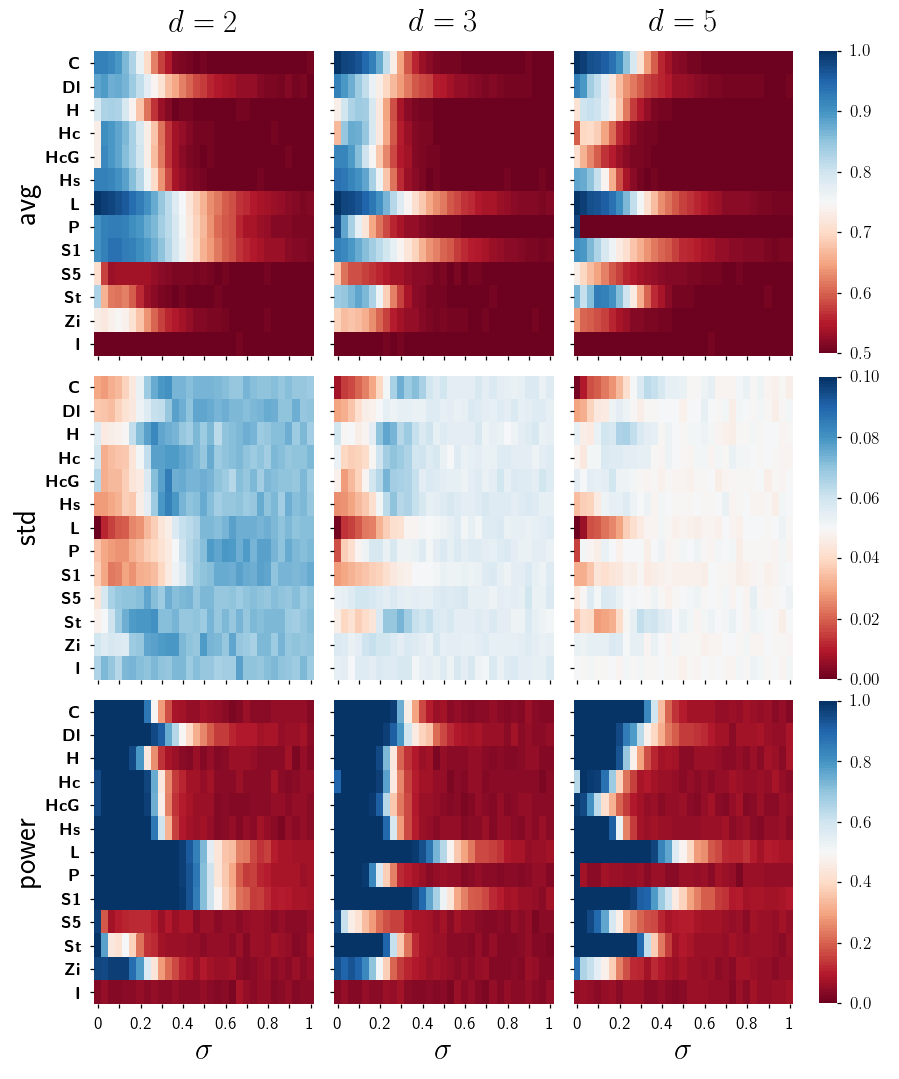

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [26]:
%matplotlib notebook

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,12), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax1 = fig.add_axes([.91, 0.672, .02, 0.28])
cbar_ax2 = fig.add_axes([.91, 0.37, .02, 0.28])
cbar_ax3 = fig.add_axes([.91, 0.07, .02, 0.28])
test = "MWP"
measure = "avgContrast"

for i, ndim in enumerate([2,3,5]):
    subdata = selectedData[(selectedData["testId"] == test) & (selectedData["nDim"] == ndim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i]
    
    sns.heatmap(dd, vmin=0.5, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3,
                cbar=i == 0, cbar_ax=None if i else cbar_ax1)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    ax.set_title(r'$d = %s$'%(ndim), y=1.04)
    if(i == 0): 
        ax.set_ylabel(r'avg')
    else:
        ax.set_ylabel("")
    
    sp = [""]*int(((len(ax.get_xticklabels())-6)/5))

    ax.set_xlabel(r'')
    
measure = "stdContrast"  
for i, ndim in enumerate([2,3,5]):
    subdata = selectedData[(selectedData["testId"] == test) & (selectedData["nDim"] == ndim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i+3]
    sns.heatmap(dd, vmin=0, vmax=0.10, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3,
                cbar=i == 0, cbar_ax=None if i else cbar_ax2)
    
    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    if(i == 0): 
        ax.set_ylabel(r'std')
    else:
        ax.set_ylabel("")

    sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
    ax.set_xticklabels(["0"] + sp + ["0.2"] + sp + ["0.4"] + sp + ["0.6"] + sp + ["0.8"] + sp + ["1"])
    ax.set_xlabel(r'')
    
measure = "powerAt95"  
for i, ndim in enumerate([2,3,5]):
    subdata = selectedData[(selectedData["testId"] == test) & (selectedData["nDim"] == ndim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])
    
    ax = axess[i+6]
    sns.heatmap(dd, vmin=0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3,
                cbar=i == 0, cbar_ax=None if i else cbar_ax3)
    
    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    if(i == 0): 
        ax.set_ylabel(r'power')
    else:
        ax.set_ylabel("")

    labels = [format(float(x.get_text()), '.1f') for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    ax.set_xticklabels(labels)

    ax.set_xlabel('$\sigma$')
    
plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig4.pdf")

## Figure 7: Power against each dependency

<IPython.core.display.Javascript object>


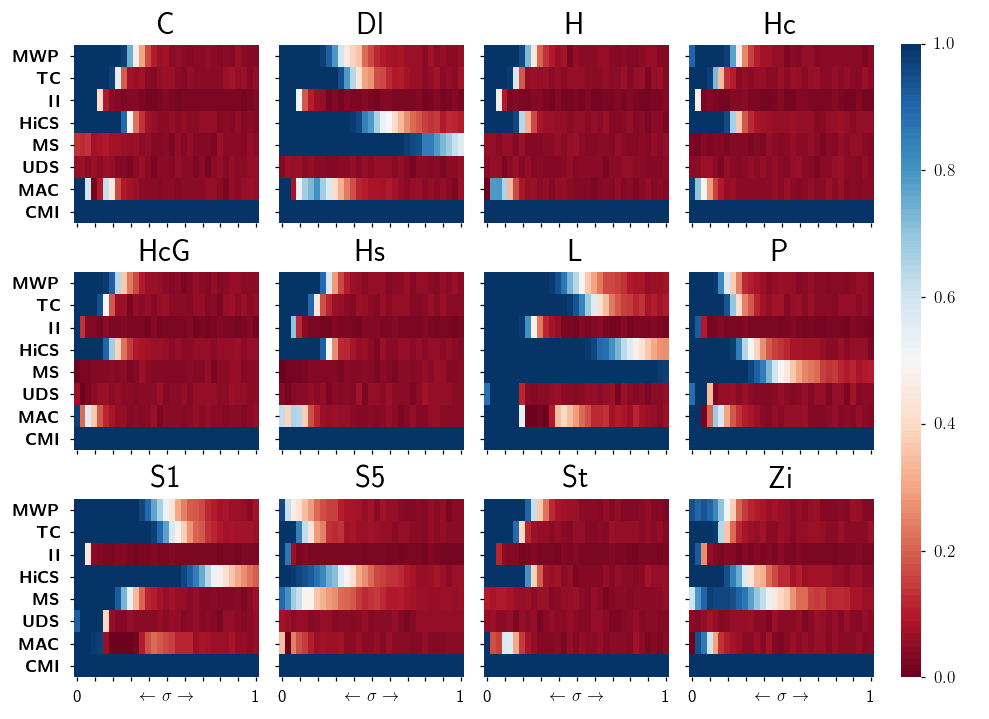

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [27]:
%matplotlib notebook

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(11,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax = fig.add_axes([.91, 0.058, .02, 0.88])

measure = "powerAt95"
nDim = 3

for i, dep in enumerate(sorted([x for x in selectedData["category"].unique() if x != "I"])):
    subdata = selectedData[(selectedData["category"] == dep) & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","testId"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "testId"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['MWP', 'TC', 'II', 'HiCS', 'MS', 'UDS', 'MAC', 'CMI'])
    dd = np.absolute(dd)

    ax = axess[i]
    
    sns.heatmap(dd, cmap=sns.color_palette("RdBu", 100), ax = ax, vmin=0, vmax=1,
                xticklabels=3,
                cbar=i == 0, cbar_ax=None if i else cbar_ax)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    ax.set_title(r'%s'%(dep), y=1.02)
    ax.set_ylabel("")
    
    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels)
    ax.set_xlabel('')
    
plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig7_d3.pdf")

<IPython.core.display.Javascript object>


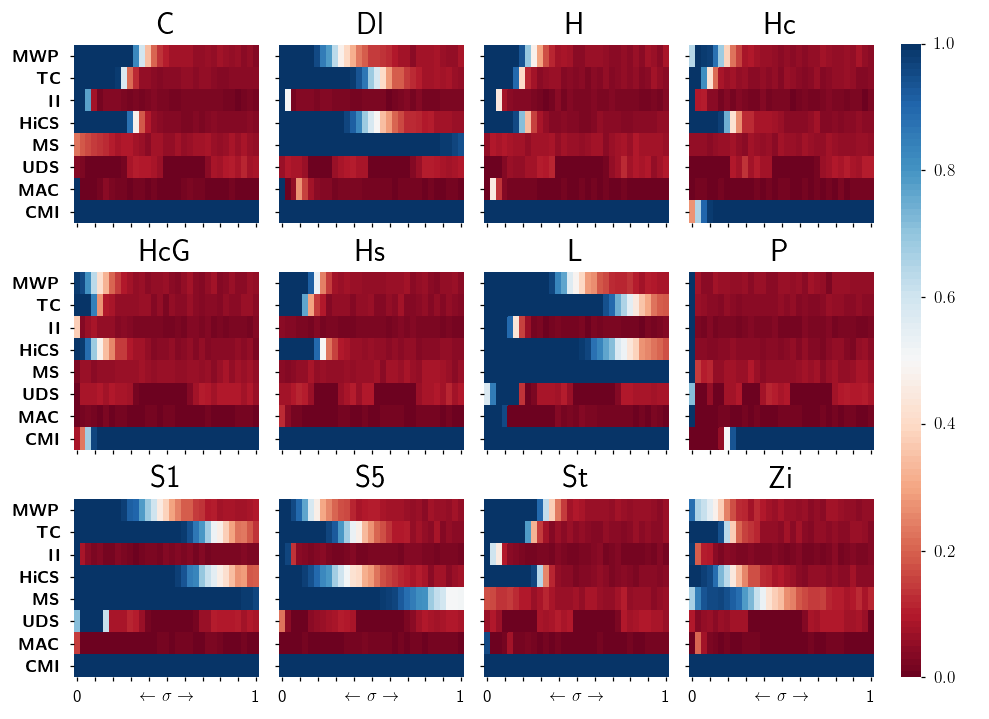

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [28]:
%matplotlib notebook

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(11,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax = fig.add_axes([.91, 0.058, .02, 0.88])

measure = "powerAt95"
nDim = 5

for i, dep in enumerate(sorted([x for x in selectedData["category"].unique() if x != "I"])):
    subdata = selectedData[(selectedData["category"] == dep) & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","testId"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "testId"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['MWP', 'TC', 'II', 'HiCS', 'MS', 'UDS', 'MAC', 'CMI'])
    dd = np.absolute(dd)

    ax = axess[i]
    
    sns.heatmap(dd, cmap=sns.color_palette("RdBu", 100), ax = ax, vmin=0, vmax=1,
                xticklabels=3,
                cbar=i == 0, cbar_ax=None if i else cbar_ax)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    ax.set_title(r'%s'%(dep), y=1.02)
    ax.set_ylabel("")
    
    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels)
    ax.set_xlabel('')
    
plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig7_d5.pdf")

## Figure 6: Distribution of dependency estimation scores, d=3

<IPython.core.display.Javascript object>


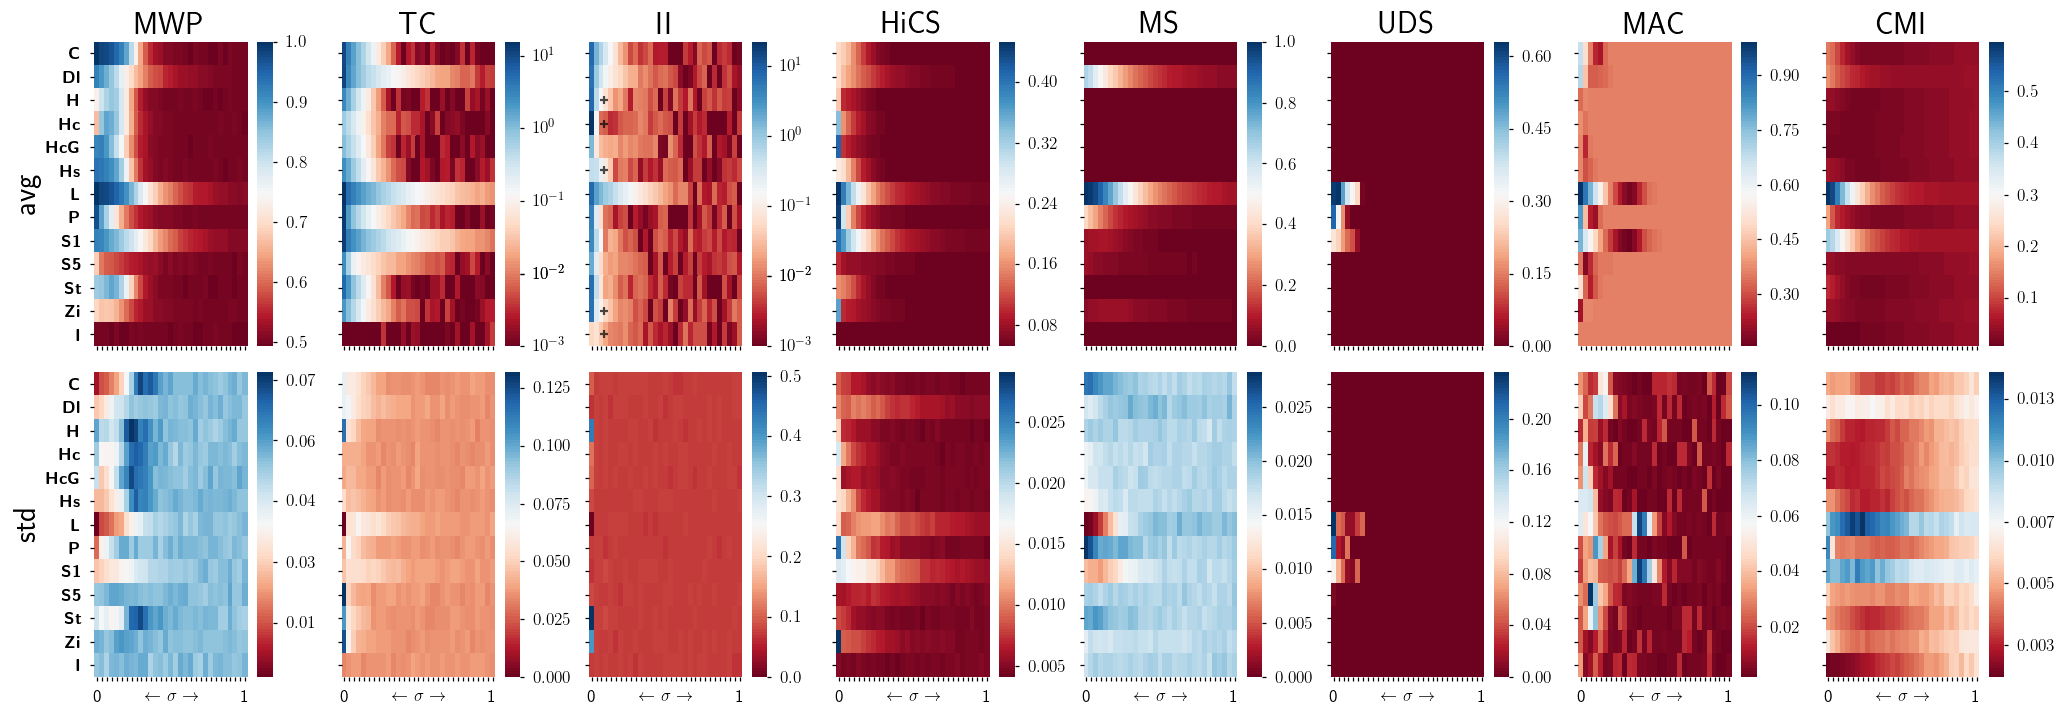

In [29]:
%matplotlib notebook
import numpy as np

measure = "avgContrast"

fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(23,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
nDim = 3

testlist = ['MWP', 'TC', 'II', 'HiCS', 'MS', 'UDS', 'MAC', 'CMI']

for i,testId in enumerate(testlist):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])
    
    ax = axess[i]
    
    dd = np.absolute(dd)
    
    if(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], 
                    ax=ax, vmax=1)
    elif(testId == "II"):
        dd = np.absolute(dd)
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    ax=ax,
                    norm=LogNorm(vmin=dd.min().min(), vmax=dd.max().max()),
                    cbar_kws={"ticks":[0.001, 0.01, 0.01, 0.1,0,1,10,1e2]},
                    vmin=0.001)

        ax.scatter(3, 2.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 3.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 5.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 11.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 12.5, marker="+", s=50, color='black', alpha=0.7)
    elif(testId == "TC"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax, 
                    norm=LogNorm(vmin=dd.min().min(), vmax=dd.max().max()),
                    cbar_kws={"ticks":[0.001, 0.01,0.01,0.1,0,1,10,1e2]},
                vmin = 0.001)
    elif(testId == "MS"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], 
                    ax=ax, vmax=1, vmin=0)
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), vmax=dd.max().max(), 
        xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'%s'%(testId))
    ax.set_ylabel("")
    
    sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
    ax.set_xticklabels(["0"] + sp + ["0.2"] + sp + ["0.4"] + sp + ["0.6"] + sp + ["0.8"] + sp + ["1"])
    
    ax.set_xlabel("")
    if(i==0):
        ax.set_ylabel("avg")
    else:
        ax.set_ylabel("")

measure="stdContrast"
for i,testId in enumerate(testlist):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi', "I"])
    
    ax = axess[i+8]
    
    dd = np.absolute(dd)
    
    if(testId == "CMI"): 
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.3f$'},
                xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    elif(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.2f$'},
                xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    elif(testId == "UDS"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.2f$'},
                xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100),
                xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    
    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title("")
    ax.set_ylabel("")
    
    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels)
    ax.set_xlabel('')
    
    if(i==0):
        ax.set_ylabel("std")
    else:
        ax.set_ylabel("")
    
plt.tight_layout()

fig.savefig("plots/Fig6.pdf")

### Larger plots for Fig6

<IPython.core.display.Javascript object>


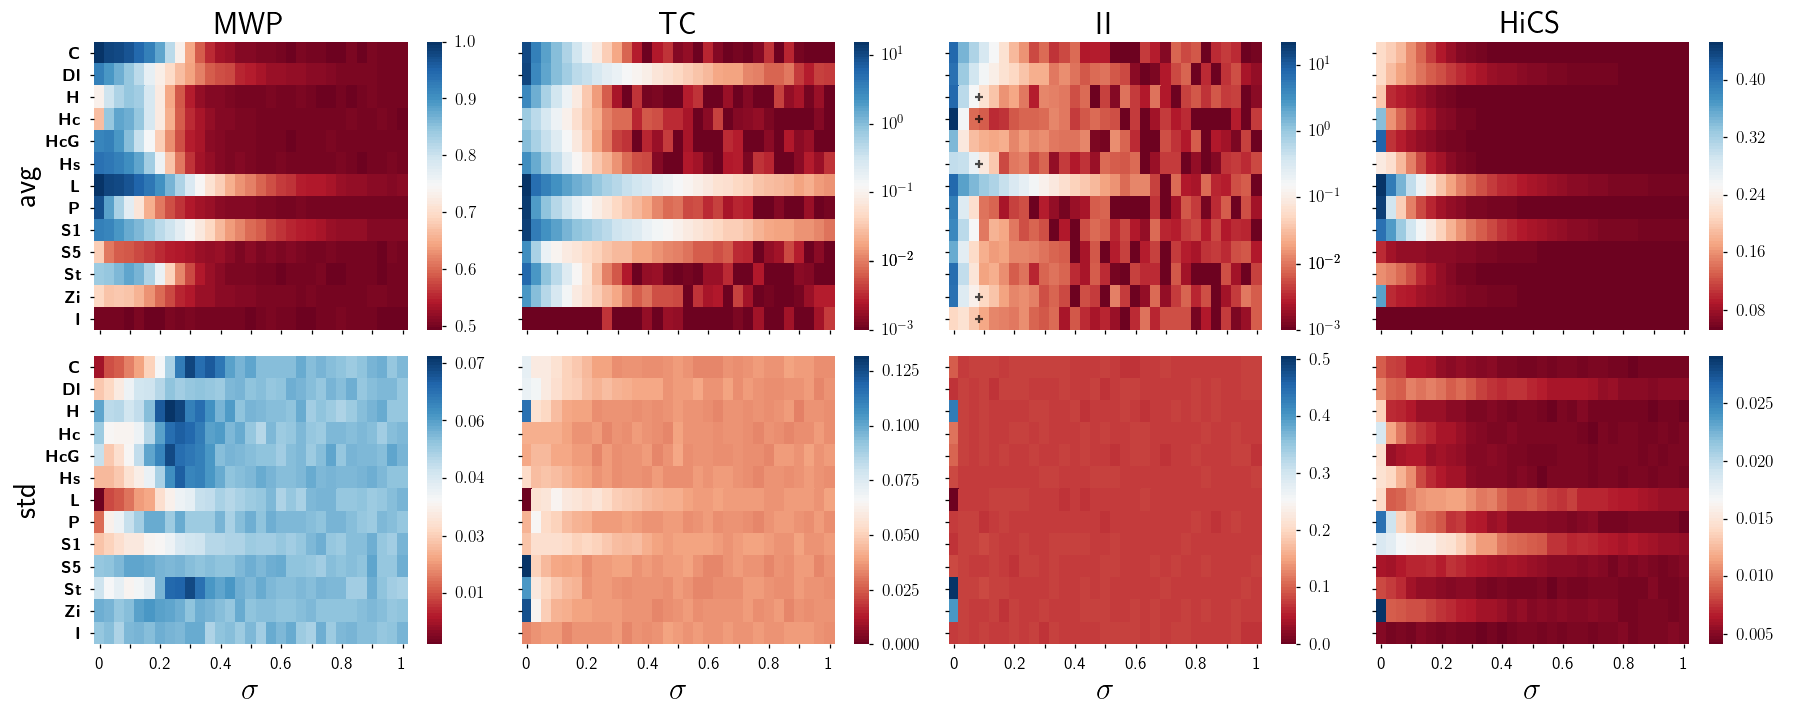

In [30]:
%matplotlib notebook
import numpy as np

measure = "avgContrast"

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
nDim = 3

testlist1 = ['MWP', 'TC', 'II', 'HiCS']

for i,testId in enumerate(testlist1):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i]
    
    dd = np.absolute(dd)

    if(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3, 
                    ax=ax, vmax=1)
    elif(testId == "II"):
        dd = np.absolute(dd)
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3,
                    ax=ax,
                    norm=LogNorm(vmin=dd.min().min(), vmax=dd.max().max()),
                    cbar_kws={"ticks":[0.001, 0.01, 0.01, 0.1,0,1,10,1e2]},
                    vmin=0.001)
        ax.scatter(3, 2.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 3.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 5.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 11.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 12.5, marker="+", s=50, color='black', alpha=0.7)
    elif(testId == "TC"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3, ax=ax, 
                    norm=LogNorm(vmin=dd.min().min(), vmax=dd.max().max()),
                    cbar_kws={"ticks":[0.001, 0.01,0.01,0.1,0,1,10,1e2]},
                vmin = 0.001)
    elif(testId == "MS"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3, 
                    ax=ax, vmax=1, vmin=0)
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), vmax=dd.max().max(), 
        xticklabels=3, ax=ax)
    

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'%s'%(testId))
    ax.set_ylabel("")
    
    sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
    ax.set_xticklabels(["0"] + sp + ["0.2"] + sp + ["0.4"] + sp + ["0.6"] + sp + ["0.8"] + sp + ["1"])
    
    ax.set_xlabel("")
    if(i==0):
        ax.set_ylabel("avg")
    else:
        ax.set_ylabel("")

measure="stdContrast"
for i,testId in enumerate(testlist1):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])
    
    ax = axess[i+4]
    
    dd = np.absolute(dd)
    
    if(testId == "CMI"): 
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.3f$'},
                xticklabels=3, ax=ax)
    elif(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.2f$'},
                xticklabels=3, ax=ax)
    elif(testId == "UDS"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.2f$'},
                xticklabels=3, ax=ax)
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100),
                xticklabels=3, ax=ax)
    
    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title("")
    ax.set_ylabel("")
    
    labels = [format(float(x.get_text()), '.1f') for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    ax.set_xticklabels(labels)

    ax.set_xlabel(r'$\sigma$')
    
    if(i==0):
        ax.set_ylabel("std")
    else:
        ax.set_ylabel("")


plt.tight_layout()

fig.savefig("plots/Fig6_large_1.pdf")

<IPython.core.display.Javascript object>


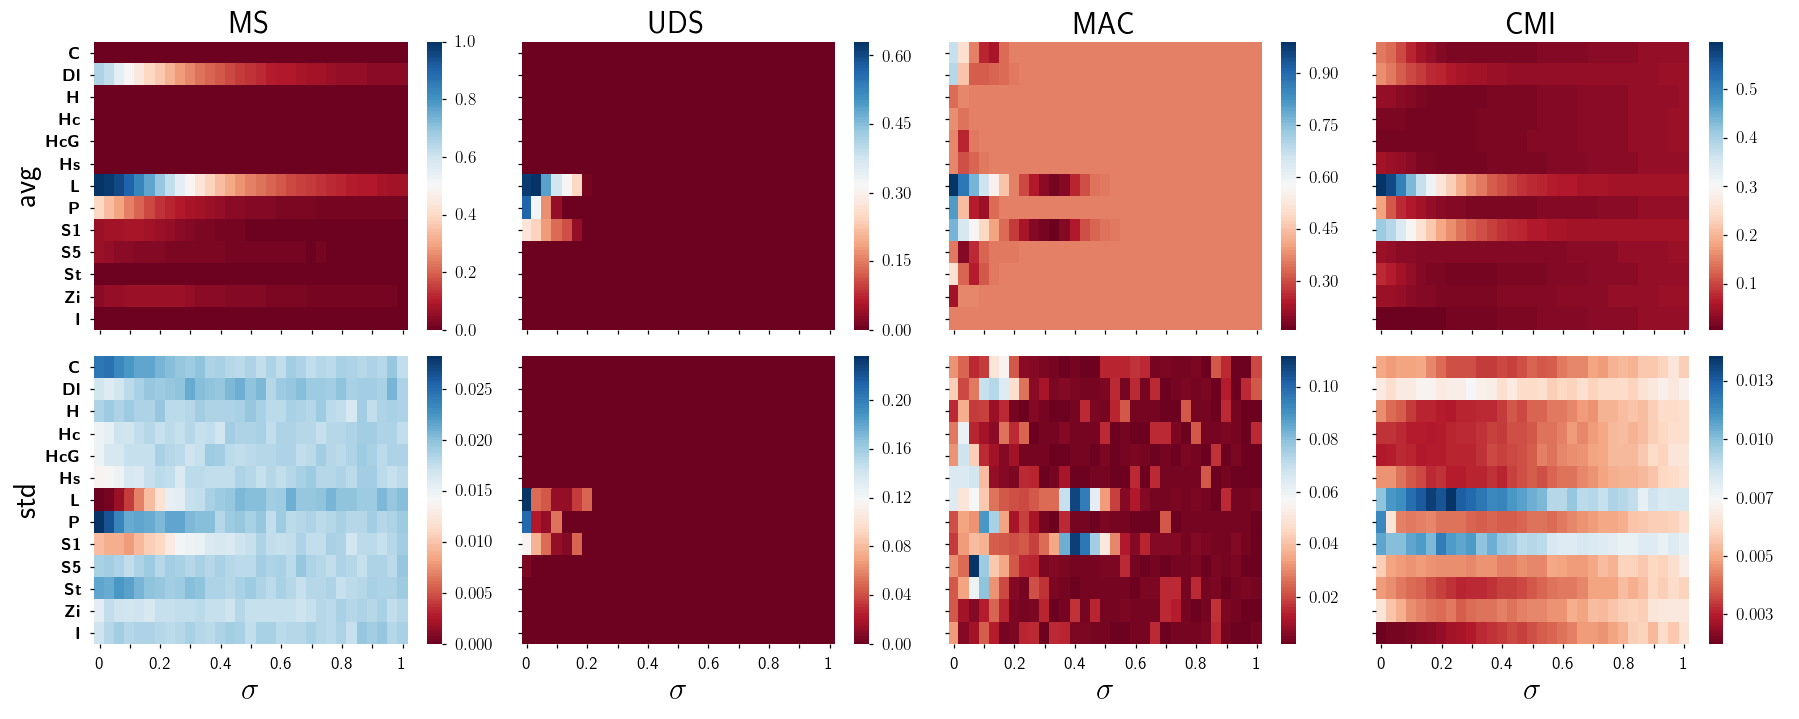

In [31]:
%matplotlib notebook
import numpy as np

measure = "avgContrast"

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
nDim = 3

testlist1 = ['MS', 'UDS', 'MAC', 'CMI']

for i,testId in enumerate(testlist1):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i]
    
    dd = np.absolute(dd)
    
    if(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3, 
                    ax=ax, vmax=1)
    elif(testId == "II"):

        dd = np.absolute(dd)
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3,
                    ax=ax,
                    norm=LogNorm(vmin=dd.min().min(), vmax=dd.max().max()),
                    cbar_kws={"ticks":[0.001, 0.01, 0.01, 0.1,0,1,10,1e2]},
                    vmin=0.001)
        ax.scatter(3, 2.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 3.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 5.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 11.5, marker="+", s=50, color='black', alpha=0.7)
        ax.scatter(3, 12.5, marker="+", s=50, color='black', alpha=0.7)
    elif(testId == "TC"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3, ax=ax, 
                    norm=LogNorm(vmin=dd.min().min(), vmax=dd.max().max()),
                    cbar_kws={"ticks":[0.001, 0.01,0.01,0.1,0,1,10,1e2]},
                vmin = 0.001)
    elif(testId == "MS"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=3, 
                    ax=ax, vmax=1, vmin=0)
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), vmax=dd.max().max(), 
        xticklabels=3, ax=ax)
    

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'%s'%(testId))
    ax.set_ylabel("")
    
    sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
    ax.set_xticklabels(["0"] + sp + ["0.2"] + sp + ["0.4"] + sp + ["0.6"] + sp + ["0.8"] + sp + ["1"])
    
    ax.set_xlabel("")
    if(i==0):
        ax.set_ylabel("avg")
    else:
        ax.set_ylabel("")

measure="stdContrast"
for i,testId in enumerate(testlist1):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])
    
    ax = axess[i+4]
    
    dd = np.absolute(dd)

    if(testId == "CMI"): 
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.3f$'},
                xticklabels=3, ax=ax)
    elif(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.2f$'},
                xticklabels=3, ax=ax)
    elif(testId == "UDS"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.2f$'},
                xticklabels=3, ax=ax)
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100),
                xticklabels=3, ax=ax)
    
    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title("")
    ax.set_ylabel("")
    
    labels = [format(float(x.get_text()), '.1f') for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    ax.set_xticklabels(labels)
    ax.set_xlabel(r'$\sigma$')
    
    if(i==0):
        ax.set_ylabel("std")
    else:
        ax.set_ylabel("")

plt.tight_layout()

fig.savefig("plots/Fig6_large_2.pdf")